In [1]:
import math
import numpy
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits import mplot3d
from prettytable import PrettyTable

In [58]:
a, b = 0, 1
T = 0.05

def Ua(t):
    return 0

def Ub(t):
    return 0

h = 0.02
p = 1
tau = 0.5 * h**2 / p

def f(x, t):
    return x

def phi(x):
    return 0

count_plots = 40

In [7]:
def task(h, tau, solution, get_rusult = False):
    count_x = int((b - a) / h) + 1
    count_t = int(T / tau) + 1
    x = numpy.linspace(a, b, count_x)
    t = numpy.linspace(0, T, count_t)

    y = numpy.zeros(shape=(count_t, count_x))
    y[0, :] = numpy.array([phi(x[i]) for i in range(0, count_x)])
    y[:, 0] = numpy.array([Ua(t[i]) for i in range(count_t)])

    for v in range(1, count_t):
        for k in range(1, count_x-1):
            y[v,k] = tau * p / h**2 * y[v-1,k-1] \
            + (1 - tau * 2 * p / h**2) * y[v-1,k] \
            + tau * p / h**2 * y[v-1,k+1] \
            + tau * f(x[k],t[v-1])
        y[v,-1] = h * Ub(t[v]) + y[v,-2]
    solution(y, x, t, h, tau, count_x, count_t)
    
    if not get_rusult:
        for i in range(0, count_t, (int)(count_t / count_plots)):
            plt.plot(x, y[i,:])
        plt.grid()
        plt.show()
    
    if get_rusult:
        return y

### Явная схема

$$
y_{k}^v=
{\tau \cdot p \over h^2} y_{k-1}^{v-1}
+ (1 - {{\tau \cdot 2p} \over h^2}) y_{k}^{v-1}
+ {\tau \cdot p \over h^2} y_{k+1}^{v-1}
+ \tau f_{k}^{v-1}
$$

##### 1 способ

$$
y_{N}^v=h \cdot Ub(t_{v}) + y_{N-1}^v
$$

In [8]:
def solution11(y, x, t, h, tau, count_x, count_t):
    for v in range(1, count_t):
        for k in range(1, count_x-1):
            y[v,k] = tau * p / h**2 * y[v-1,k-1] \
            + (1 - tau * 2 * p / h**2) * y[v-1,k] \
            + tau * p / h**2 * y[v-1,k+1] \
            + tau * f(x[k],t[v-1])
        y[v,-1] = h * Ub(t[v]) + y[v,-2]

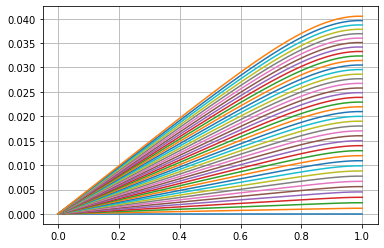

In [9]:
task(h, tau, solution11)

##### 2 способ

$$
y_{N+1}^v= 2h \cdot Ub(t_{v}) + y_{N-1}^v \\
y_{N}^v=
{\tau \cdot p \over h^2} y_{N-1}^{v-1}
+ (1 - {{\tau \cdot 2p} \over h^2}) y_{N}^{v-1}
+ {\tau \cdot p \over h^2} y_{N+1}^{v-1}
+ \tau f_{k}^{v-1}
$$

In [10]:
def solution12(y, x, t, h, tau, count_x, count_t):
    for v in range(1, count_t):
        for k in range(1, count_x-1):
            y[v,k] = tau * p / h**2 * y[v-1,k-1] \
            + (1 - tau * 2 * p / h**2) * y[v-1,k] \
            + tau * p / h**2 * y[v-1,k+1] \
            + tau * f(x[k],t[v-1])
        temp = 2 * h * Ub(t[v]) + y[v,-2]
        y[v,-1] = tau * p / h**2 * y[v-1,-2] \
            + (1 - tau * 2 * p / h**2) * y[v-1,-1] \
            + tau * p / h**2 * temp \
            + tau * f(x[-1],t[v-1])

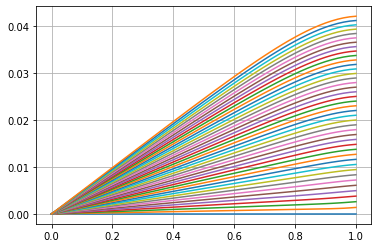

In [11]:
task(h, tau, solution12)

### Неявная схема

$$
{\tau \cdot p \over h^2} y_{k-1}^{v}
- (1 + {{\tau \cdot 2p} \over h^2}) y_{k}^{v}
+ {\tau \cdot p \over h^2} y_{k+1}^{v}
= -y_{k}^{v-1} -\tau f_{k}^{v}
$$


##### 1 способ

$$
-y_{N-1}^v+y_{N}^v=h \cdot Ub(t_{v})
$$

In [12]:
def solution21(y, x, t, h, tau, count_x, count_t):
    for v in range(1, count_t):
        A1 = A3 = tau * p / h**2
        A2 = - 1 - tau * 2 * p / h**2
        A = numpy.zeros(shape=(count_x-1, count_x-1))
        A[0,0] = A2
        A[0,1] = A3
        for k in range(1, count_x-2):
            A[k, k-1] = A1
            A[k, k] = A2
            A[k, k+1] = A3
        A[-1,-2] = -1 #
        A[-1,-1] = 1
        B = numpy.array([-y[v-1, k] - tau*f(x[k],t[v]) for k in range(1, count_x)])
        B[0] -= A1 * y[v,0]#
        B[-1] = h * Ub(t[v])#
        y[v,1:] = numpy.linalg.solve(A,B)

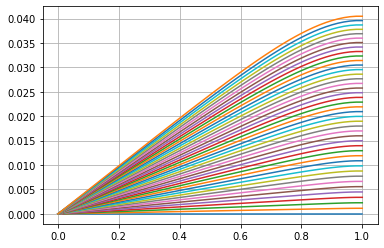

In [13]:
task(h, tau, solution21)

##### 2 способ

$$
{\tau \cdot p \over h^2} y_{k-1}^{v}
- (1 + {{\tau \cdot 2p} \over h^2}) y_{k}^{v}
+ {\tau \cdot p \over h^2} y_{k+1}^{v}
= -y_{k}^{v-1} -\tau f_{k}^{v}
$$

$$
y_{N+1}^v= 2h \cdot Ub(t_{v}) + y_{N-1}^v 
$$

In [14]:
def solution22(y, x, t, h, tau, count_x, count_t):
    for v in range(1, count_t):
        A1 = A3 = tau * p / h**2
        A2 = - 1 - tau * 2 * p / h**2
        A = numpy.zeros(shape=(count_x-1, count_x-1))
        A[0,0] = A2
        A[0,1] = A3
        for k in range(1, count_x-2):
            A[k, k-1] = A1
            A[k, k] = A2
            A[k, k+1] = A3
        A[-1,-2] = A1 + A3#
        A[-1,-1] = A2#
        B = numpy.array([-y[v-1, k] - tau*f(x[k],t[v]) for k in range(1, count_x)])
        B[0] -= A1 * y[v,0]
        B[-1] -= A3 * 2 * h * Ub(t[v])#
        y[v,1:] = numpy.linalg.solve(A,B)

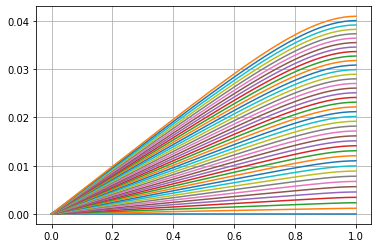

In [15]:
task(h, tau, solution22)

### Таблицы

##### tau = const

In [69]:
def get_s(a, b):
    res = 0
    first, second = a, b
    if len(first) > len(second):
        first, second = second, first
    for i in range(0, len(first)):
        res += (first[i] - second[2*i]) ** 2
    return math.sqrt(res/len(first))
    
def get_m(a, b):
    res = abs(a[0]-b[0])
    first, second = a, b
    if len(first) > len(second):
        first, second = second, first
    for i in range(0, len(first)-1):
        t = abs(first[i] - second[2*i])
        if t > res:
            res = t
    return t

table = PrettyTable()
table.field_names = ['h', 'tau', 's1', 's2', 'm1', 'm2']

t1, t2 = 3,15

h0 = 0.5
tau0 = 0.5 * (h0/8)**2 / p
h_array = [h0/2, h0/4, h0/8]
y_last = task(h0, tau0, solution11, True)

print("t1 = " + str(tau0*t1))
print("t2 = " + str(tau0*t2))

_round = 16
for _h in h_array:
    if(tau0 > 0.5 * (_h)**2 / p):
        print("Error")
        break
    y_new = task(_h, tau0, solution11, True)
    s1 = round(get_s(y_last[t1], y_new[t1]),_round)
    s2 = round(get_s(y_last[t2], y_new[t2]),_round)
    m1 = round(get_m(y_last[t1], y_new[t1]),_round)
    m2 = round(get_m(y_last[t2], y_new[t2]),_round)
    table.add_row([_h, tau0, s1, s2, m1, m2])
    y_last = y_new
    
print(table)

t1 = 0.005859375
t2 = 0.029296875
+--------+-------------+--------------------+--------------------+-------------------+--------------------+
|   h    |     tau     |         s1         |         s2         |         m1        |         m2         |
+--------+-------------+--------------------+--------------------+-------------------+--------------------+
|  0.25  | 0.001953125 | 0.000832854307272  | 0.003872061005813  | 2.23517417908e-05 | 0.0006078681605455 |
| 0.125  | 0.001953125 | 0.0003091272445868 | 0.0013182740640654 | 4.14848327637e-05 | 0.0006957042913715 |
| 0.0625 | 0.001953125 | 0.0001022563422547 | 0.0004459272340832 | 5.72204589844e-05 | 0.0005498607564387 |
+--------+-------------+--------------------+--------------------+-------------------+--------------------+


##### h = const

In [80]:
def get_s(a, b):
    res = 0
    for i in range(0, len(a)):
        res += (a[i] - b[i]) ** 2
    return math.sqrt(res/len(a))
    
def get_m(a, b):
    res = abs(a[0]-b[0])
    for i in range(0, len(a)-1):
        t = abs(a[i] - b[i])
        if t > res:
            res = t
    return t

table = PrettyTable()
table.field_names = ['h', 'tau', 's1', 's2', 'm1', 'm2']

t1, t2 = 1, 2


h0 = 0.2
tau0 = 0.5 * h0**2 / p
tau_array = [tau0/2, tau0/4, tau0/8, tau0/16]
y_last = task(h0, tau0, solution11, True)

print("t1 = " + str(tau0*t1))
print("t2 = " + str(tau0*t2))

_round = 15
for _tau in tau_array:
    if(_tau > 0.5 * (h0)**2 / p):
        print("Error")
        break
    y_new = task(h0, _tau, solution11, True)
    s1 = round(get_s(y_last[t1], y_new[t1*2]),_round)
    s2 = round(get_s(y_last[t2], y_new[t2*2]),_round)
    m1 = round(get_m(y_last[t1], y_new[t1*2]),_round)
    m2 = round(get_m(y_last[t2], y_new[t2*2]),_round)
    table.add_row([h0, _tau, s1, s2, m1, m2])
    y_last = y_new
    t1 *= 2
    t2 *= 2
    
print(table)

t1 = 0.020000000000000004
t2 = 0.04000000000000001
+-----+-----------------------+-------------------+-------------------+------------------+-------------------+
|  h  |          tau          |         s1        |         s2        |        m1        |         m2        |
+-----+-----------------------+-------------------+-------------------+------------------+-------------------+
| 0.2 |  0.010000000000000002 | 0.000288675134595 | 0.000364880831003 |      0.0005      |     0.0005625     |
| 0.2 |  0.005000000000000001 |  0.00011290459112 | 0.000174839078462 |  0.00019140625   | 0.000278322219849 |
| 0.2 | 0.0025000000000000005 |  5.3111190598e-05 |  8.5072766471e-05 | 8.9349515736e-05 | 0.000134944928697 |
| 0.2 | 0.0012500000000000002 |  2.5856212274e-05 |  4.1983328044e-05 | 4.332416922e-05  |  6.645595508e-05  |
+-----+-----------------------+-------------------+-------------------+------------------+-------------------+


In [81]:
def get_s(a, b):
    res = 0
    first, second = a, b
    if len(first) > len(second):
        first, second = second, first
    for i in range(0, len(first)):
        res += (first[i] - second[2*i]) ** 2
    return math.sqrt(res/len(first))
    
def get_m(a, b):
    res = abs(a[0]-b[0])
    first, second = a, b
    if len(first) > len(second):
        first, second = second, first
    for i in range(0, len(first)-1):
        t = abs(first[i] - second[2*i])
        if t > res:
            res = t
    return t

table = PrettyTable()
table.field_names = ['h', 'tau', 's1', 's2', 'm1', 'm2']

t1, t2 = 3, 5

h0 = 0.5
h_array = [h0/2, h0/4, h0/8]
tau0 = 0.5 * (h0/4)**2 / p
tau_array = [tau0/2, tau0/4, tau0/8]
y_last = task(h0, tau0, solution11, True)

print("t1 = " + str(tau0*t1))
print("t2 = " + str(tau0*t2))

_round = 16
for i in range(len(h_array)):
    _h = h_array[i]
    _tau = tau_array[i]
    if(_tau > 0.5 * (_h)**2 / p):
        print("Error")
        break
    y_new = task(_h, _tau, solution11, True)
    s1 = round(get_s(y_last[t1], y_new[t1*2]),_round)
    s2 = round(get_s(y_last[t2], y_new[t2*2]),_round)
    m1 = round(get_m(y_last[t1], y_new[t1*2]),_round)
    m2 = round(get_m(y_last[t2], y_new[t2*2]),_round)
    table.add_row([_h, _tau, s1, s2, m1, m2])
    y_last = y_new
    t1 *= 2
    t2 *= 2
    
print(table)

t1 = 0.0234375
t2 = 0.0390625
+--------+--------------+--------------------+--------------------+--------------------+--------------------+
|   h    |     tau      |         s1         |         s2         |         m1         |         m2         |
+--------+--------------+--------------------+--------------------+--------------------+--------------------+
|  0.25  |  0.00390625  | 0.0031084336917918 | 0.0049755028246464 | 0.0002960525453091 | 0.0008466919541803 |
| 0.125  | 0.001953125  | 0.0010435645062551 | 0.0016525476932884 | 0.0004306274115038 | 0.000949540522216  |
| 0.0625 | 0.0009765625 | 0.0003400557940125 | 0.0005658696377954 | 0.0003757239870475 | 0.0007323634672317 |
+--------+--------------+--------------------+--------------------+--------------------+--------------------+


### Невыполняние условия устойчивости

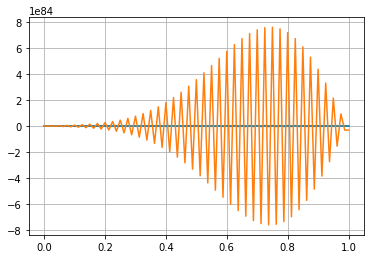

In [82]:
task(0.0125, 0.0001, solution11)